# Week 1 Exercises: Statistics for Data Science

### Part 1: Metro Government Salaries

The file General_Government_Employees_Titles_and_Base_Annual_Salaries.csv contains the base annual salary of all Metro Government employees.

Read in this dataset as a dataframe named *salaries*.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

salaries = pd.read_csv("../data/General_Government_Employees_Titles_and_Base_Annual_Salaries.csv")

In [3]:
print(salaries)

                        Name                       Title  \
0        Aaron, Donald W. Jr   Assoc Admin-Police & Fire   
1          Abbady, Khalid Jr            Police Officer 2   
2        Anderson, Brandon M      Correctional Officer 1   
3     Anderson, Brian Joseph           Police Lieutenant   
4        Anderson, Carlos A.             Police Sergeant   
...                      ...                         ...   
9533      Zoccola, Alison M.  Domestic Vio Victim Adv-MO   
9534       Zoccola, David L.       Criminal Investigator   
9535       Zuhlke, Matthew L      Correctional Officer 1   
9536          Zullo, Brian M            Police Officer 2   
9537    Zunic, Destiny Kayla            Police Officer 2   

                   Department Employment Status     Annual  
0                      Police          Fulltime  160452.89  
1                      Police          Fulltime   56478.93  
2                     Sheriff          Fulltime   40542.65  
3                      Police      

1. What percentage of employees are full time?

In [4]:
employment_status = salaries['Employment Status'].value_counts(normalize=True)
print(employment_status.head(n=1))

Employment Status
Fulltime    0.896729
Name: proportion, dtype: float64


2. Create a bar chart showing the number of employees per department. Which has the largest number of employees?

<Axes: title={'center': 'Employees Per Department'}, xlabel='Department'>

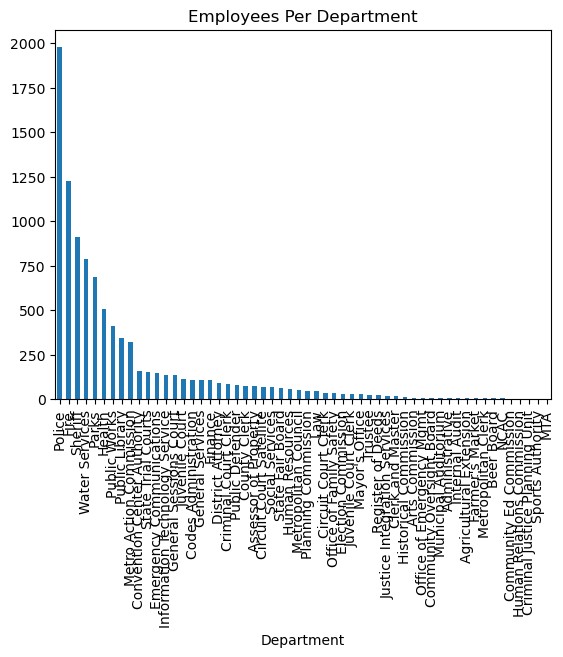

In [5]:
departments = salaries['Department'].value_counts()
departments.plot(kind="bar", title="Employees Per Department")

In [6]:
print(departments.head(n=1))

Department
Police    1977
Name: count, dtype: int64


3. What is the most common job title for metro employees?

In [7]:
titles = salaries['Title'].value_counts().idxmax()
num = salaries['Title'].value_counts().max()
print(titles)
print(num)

Police Officer 2
937


4. What are the mean and median salaries?

In [8]:
print(f"MEAN: {salaries['Annual'].mean()}")
print(f"MEDIAN: {salaries['Annual'].median()}")

MEAN: 56091.10348859518
MEDIAN: 53054.5


5. Plot the distribution of the dataset via a histogram. Is the data symmetric? skewed? How many modes does it have?

Text(0, 0.5, 'Count')

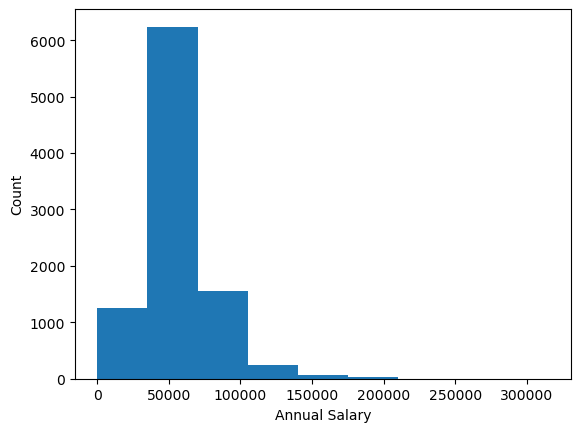

In [9]:
bins = np.arange(start=0, stop=350000, step=35000)
plt.hist(
    data=salaries,
    x="Annual",
    bins=bins
)
plt.xlabel("Annual Salary")
plt.ylabel("Count")

6. Find the standard deviation of salaries, and use this to compute z-scores for each observation. Inspect the results. Do you find anything interesting?

Standard Deviation: 24058.631056795053
z-score Mean: 3.7109991528719795e-17
z-score Std Dev: 0.9999999999999923


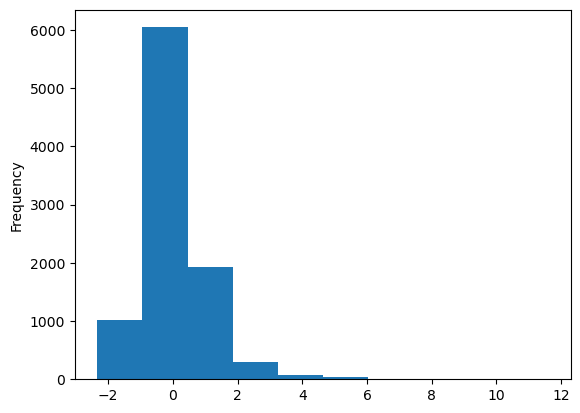

In [13]:
salaries_std_dev = salaries['Annual'].std(ddof=0)
print(f"Standard Deviation: {salaries_std_dev}")

salaries['z-score'] = (salaries['Annual'] - salaries['Annual'].mean()) / salaries_std_dev
salaries['z-score'].plot(kind="hist")

print(f"z-score Mean: {salaries['z-score'].mean()}")
print(f"z-score Std Dev: {salaries['z-score'].std(ddof=0)}")

### Part 2: Temperatures 

The files BNA_temps.csv and LAX_temps.csv contain the daily high (TMAX) and low (TMIN) temperatures recorded at BNA and LAX airports, respectively, for the years 2012 through 2018.

Read in these file as dataframes named *bna* and *lax*.

In [14]:
bna = pd.read_csv("../data/BNA_temps.csv")
lax = pd.read_csv("../data/LAX_temps.csv")

1. How do the mean high temperatures compare for BNA and LAX? What about the medians?

In [15]:
bna_tmax_mean = bna['TMAX'].mean()
print(f"BNA TMAX Mean: {bna_tmax_mean}")

lax_tmax_mean = lax['TMAX'].mean()
print(f"LAX TMAX Mean: {lax_tmax_mean}")

bna_tmax_median = bna['TMAX'].median()
print(f"BNA TMAX Median: {bna_tmax_median}")

lax_tmax_median = lax['TMAX'].median()
print(f"LAX TMAX Median: {lax_tmax_median}")

BNA TMAX Mean: 71.8564724286273
LAX TMAX Mean: 71.86312084473992
BNA TMAX Median: 75.0
LAX TMAX Median: 72.0


2. Inspect the histograms for TMAX for both BNA and LAX. How would you describe these distributions (are they symmetric? are they skewed?) How do the distributions compare?

Text(0.5, 0, 'Tempurature')

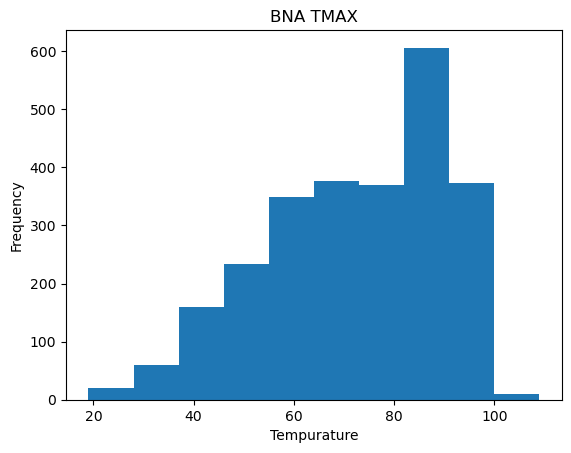

In [16]:
bna['TMAX'].plot(kind="hist", title="BNA TMAX")
plt.xlabel("Tempurature")

Text(0.5, 0, 'Tempurature')

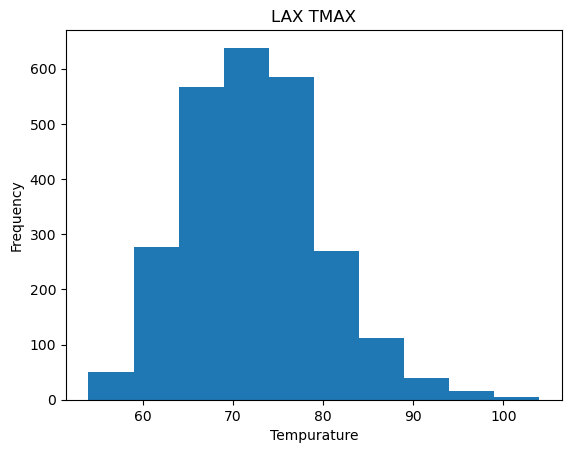

In [17]:
lax['TMAX'].plot(kind="hist", title="LAX TMAX")
plt.xlabel("Tempurature")

3. Before doing any computations, think about whether you expect the high temperatures for BNA or LAX to have the same standard deviation or whether you expect one to have higher standard deviation than the other. Then, compute the standard deviations and see if you were correct.

In [18]:
bna_tmax_std_dev = bna['TMAX'].std(ddof=1)
print(f"BNA TMAX Std Dev: {bna_tmax_std_dev}")

lax_tmax_std_dev = lax['TMAX'].std(ddof=1)
print(f"LAX TMAX Std Dev: {lax_tmax_std_dev}")

BNA TMAX Std Dev: 17.51690805573467
LAX TMAX Std Dev: 7.476674534009332


4. Look at the boxplot of high temperatures by month for each airport. What do you notice?

<Axes: xlabel='MONTH', ylabel='TMAX'>

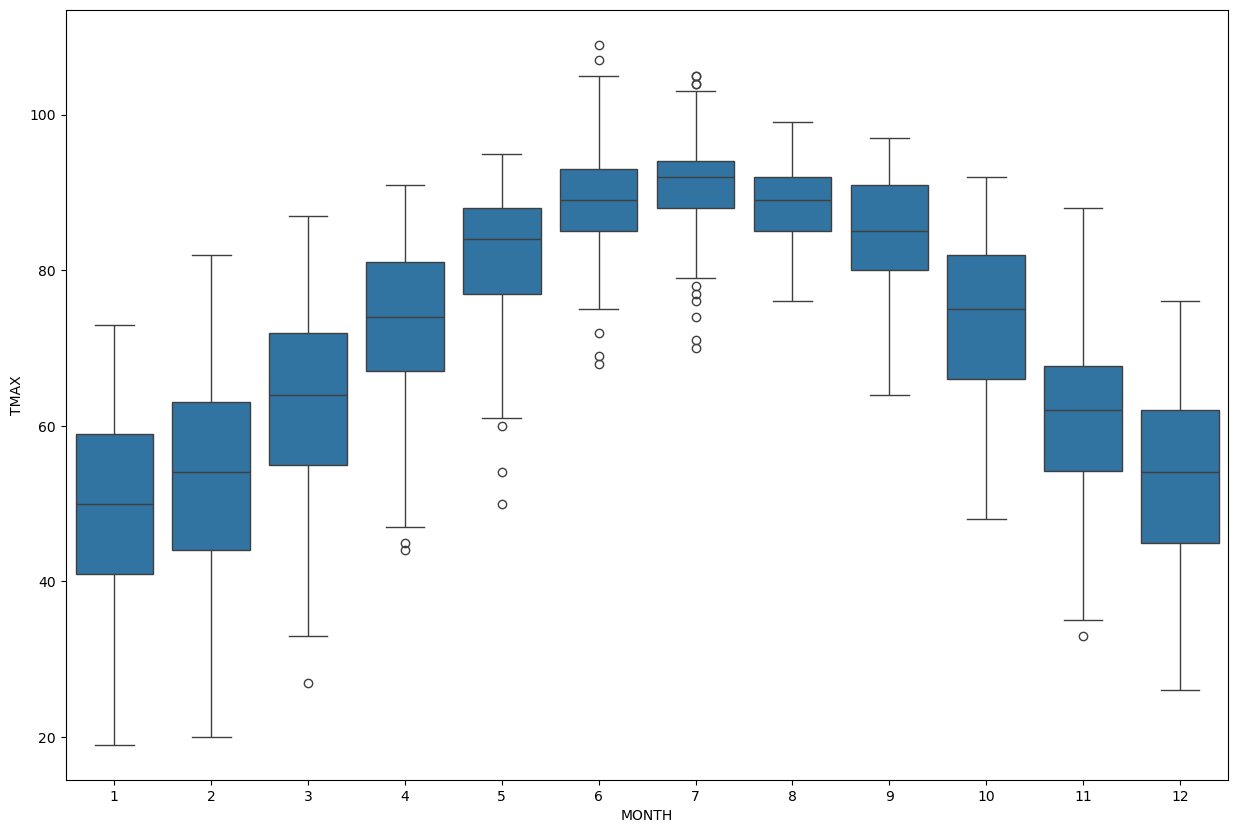

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=bna, x="MONTH", y="TMAX")

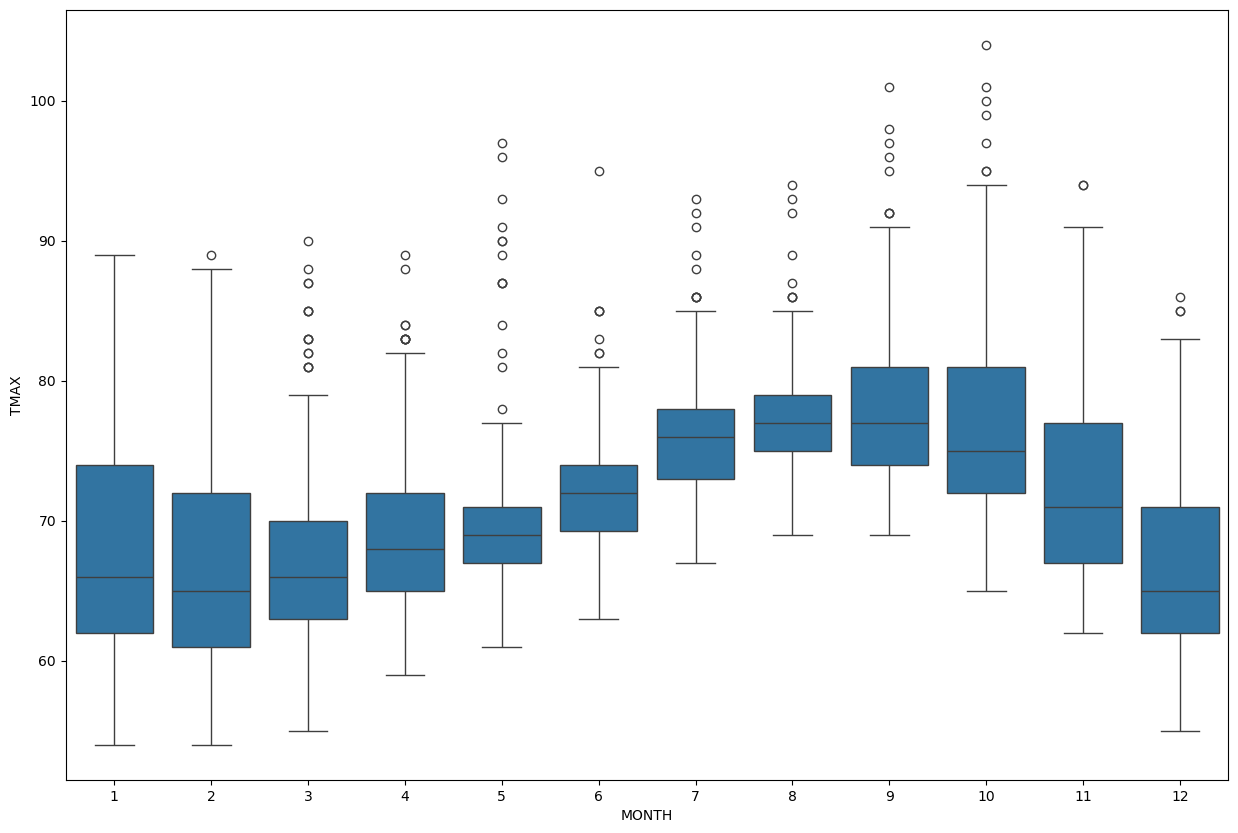

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=lax, x="MONTH", y="TMAX");

### Part 3: Conceptual 
1. In what scenarios might the mean of a dataset be significantly lower than the median? Can you come up with any examples of such a distribution?

ANSWER: A skewed dataset with a long tail to the left.

2. Can you come up with an example of a distribution that has a median of 0 but a nonzero mean?

ANSWER: -1, -1, 0, 10, 20

3. You are analyzing the housing market in Davidson County. You notice that there are some very expensive homes and are afraid that including these homes might skew your analysis. You are considering dropping the top 1% and bottom 1% of the observations prior to your analysis. What impacts might this have? What alternatives do you have if you do not wish to drop any observations?

ANSWER: Dropping the top and bottom 1% will change the mean. An alternative would be to view the data in percentiles.

4. You are analyzing daily stock market returns. You are considering dropping the top 1% and bottom 1% of the observations prior to your analysis. What impacts might this have on your analysis?

ANSWER: Dropping the top and bottom 1% will change the mean.

5. Say you are interested in studying commute times. You are looking at the daily commute times for two different people. Person A commutes from Murfreesboro into Nashville. Person B commutes in the opposite direction, from Nashville to Murfreesboro. If you look at the distribution of their daily commute times over a one-year period, which would you expect to have a larger standard deviation and why? Assume that they both leave for work around rush hour every morning.

ANSWER: Person A because traffic headed into Nashville can vary wildly due to variances like wrecks or construction.